In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
combined_df = pd.read_csv("./horror_movies.csv",index_col="title")
combined_df

,original_language,release_year,release_month,runtime,genre,averageRating,budget,revenue,agg_profit,norm_revenue
title,,,,,,,,,,
Venus,es,2022,12,\N,\N,5.9,6.374074e+06,6.112861e+13,6.112861e+13,6.112861e+13
The Menu,en,2022,11,90,"Crime,Drama",6.2,3.177252e+07,5.748730e+15,5.748730e+15,5.748730e+15
Terror Train,en,2022,10,97,"Horror,Mystery,Thriller",5.8,3.703051e+06,6.400000e+13,6.400000e+13,6.400000e+13
Halloween Ends,en,2022,10,111,"Drama,Horror,Mystery",5.0,2.116029e+07,1.110933e+16,1.110933e+16,1.110933e+16
The Visitor,en,2022,10,108,"Horror,Sci-Fi",5.2,4.232058e+06,3.676736e+14,3.676736e+14,3.676736e+14
...,...,...,...,...,...,...,...,...,...,...
A Ghost Story,en,1964,2,92,"Drama,Fantasy,Mystery",6.8,1.020392e+06,7.671692e+12,7.671691e+12,1.300287e+11
Insomnia,fr,1963,1,85,Comedy,5.5,4.771002e+08,1.291007e+16,1.291007e+16,2.151679e+14
Where the Truth Lies,fr,1962,3,83,Thriller,6.4,2.618779e+08,2.004082e+12,2.003820e+12,3.285380e+10


In [ ]:
sns.pairplot(combined_df)
plt.show()

In [35]:
en_df = combined_df.loc[combined_df["original_language"]=="en",:]
ja_df = combined_df.loc[combined_df["original_language"]=="ja",:]
fr_df = combined_df.loc[combined_df["original_language"]=="fr",:]
es_df = combined_df.loc[combined_df["original_language"]=="es",:]
not_en_df = combined_df.loc[combined_df["original_language"]!="en",:]

print(f"""no of english: {len(en_df)}
no of japanese: {len(ja_df)}
no of french: {len(fr_df)}
no of spanish: {len(es_df)}
""")

no of english: 733
no of japanese: 10
no of french: 16
no of spanish: 12



*There really isn't enough data to compare different regions, besides english vs everything else*

## Correlation: All vs English vs Not English

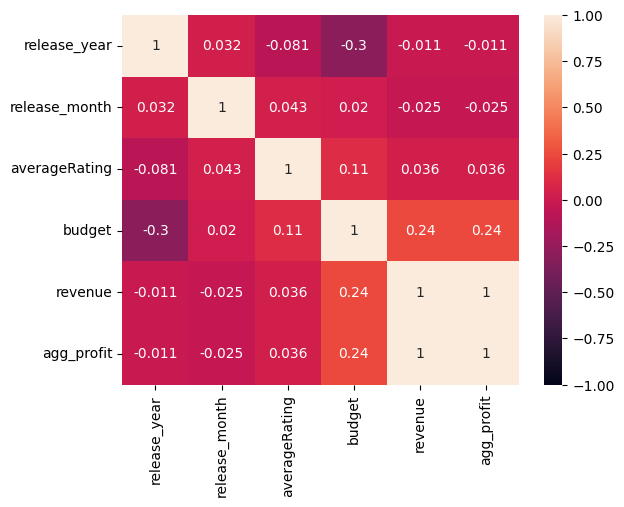

In [40]:
corr_data = combined_df[["release_year", "release_month", "averageRating", "budget", "revenue", "agg_profit"]].corr()
sns.heatmap(corr_data, vmin=-1, vmax=1, annot=True)
plt.show()

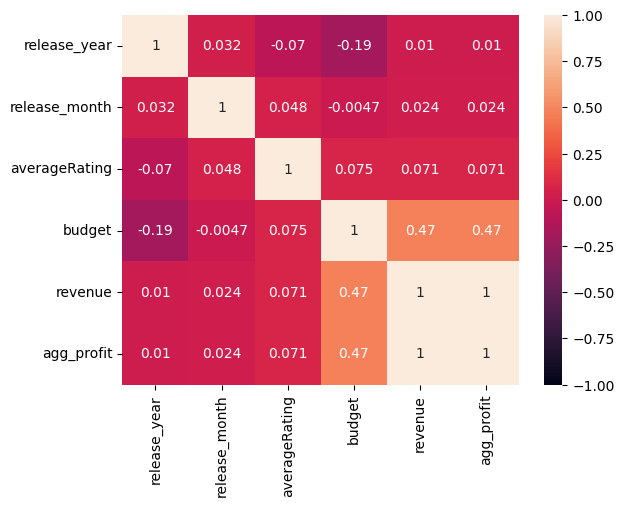

In [33]:
corr_data = en_df[["release_year", "release_month", "averageRating", "budget", "revenue", "agg_profit"]].corr()
sns.heatmap(corr_data, vmin=-1, vmax=1, annot=True)
plt.show()

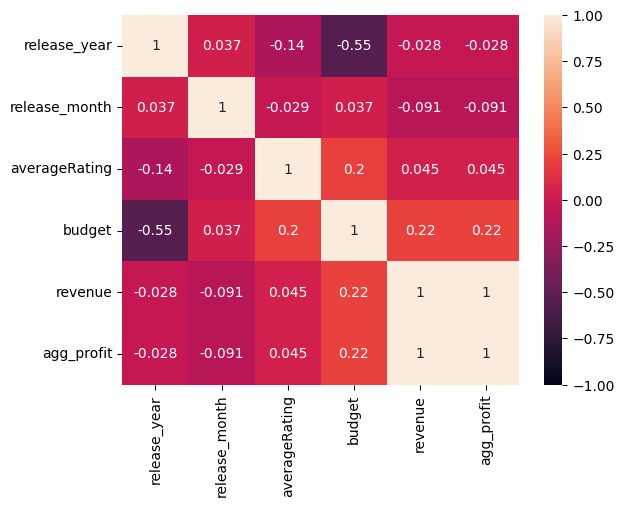

In [36]:
corr_data = not_en_df[["release_year", "release_month", "averageRating", "budget", "revenue", "agg_profit"]].corr()
sns.heatmap(corr_data, vmin=-1, vmax=1, annot=True)
plt.show()

## Month Trends

## Only modern movies

In [10]:
# only modern movies
cent21_df = combined_df[combined_df["release_year"] >= 2000]
print("Percent of original dataset: ", len(cent21_df) / len(combined_df))
cent21_df

Percent of original dataset:  0.8173190984578885


,original_language,release_year,release_month,runtime,genre,averageRating,budget,revenue,agg_profit,norm_revenue
title,,,,,,,,,,
Venus,es,2022,12,\N,\N,5.9,6.374074e+06,6.112861e+13,6.112861e+13,6.112861e+13
The Menu,en,2022,11,90,"Crime,Drama",6.2,3.177252e+07,5.748730e+15,5.748730e+15,5.748730e+15
Terror Train,en,2022,10,97,"Horror,Mystery,Thriller",5.8,3.703051e+06,6.400000e+13,6.400000e+13,6.400000e+13
Halloween Ends,en,2022,10,111,"Drama,Horror,Mystery",5.0,2.116029e+07,1.110933e+16,1.110933e+16,1.110933e+16
The Visitor,en,2022,10,108,"Horror,Sci-Fi",5.2,4.232058e+06,3.676736e+14,3.676736e+14,3.676736e+14
...,...,...,...,...,...,...,...,...,...,...
Shadow of the Vampire,en,2000,5,92,"Drama,Horror",6.9,1.470792e+07,6.854212e+13,6.854211e+13,2.980092e+12
Believe,en,2000,3,96,"Family,Horror",5.1,6.445990e+06,7.926394e+11,7.926330e+11,3.446258e+10
Scream 3,en,2000,2,116,"Horror,Mystery",5.7,7.427585e+07,2.619156e+16,2.619156e+16,1.138764e+15


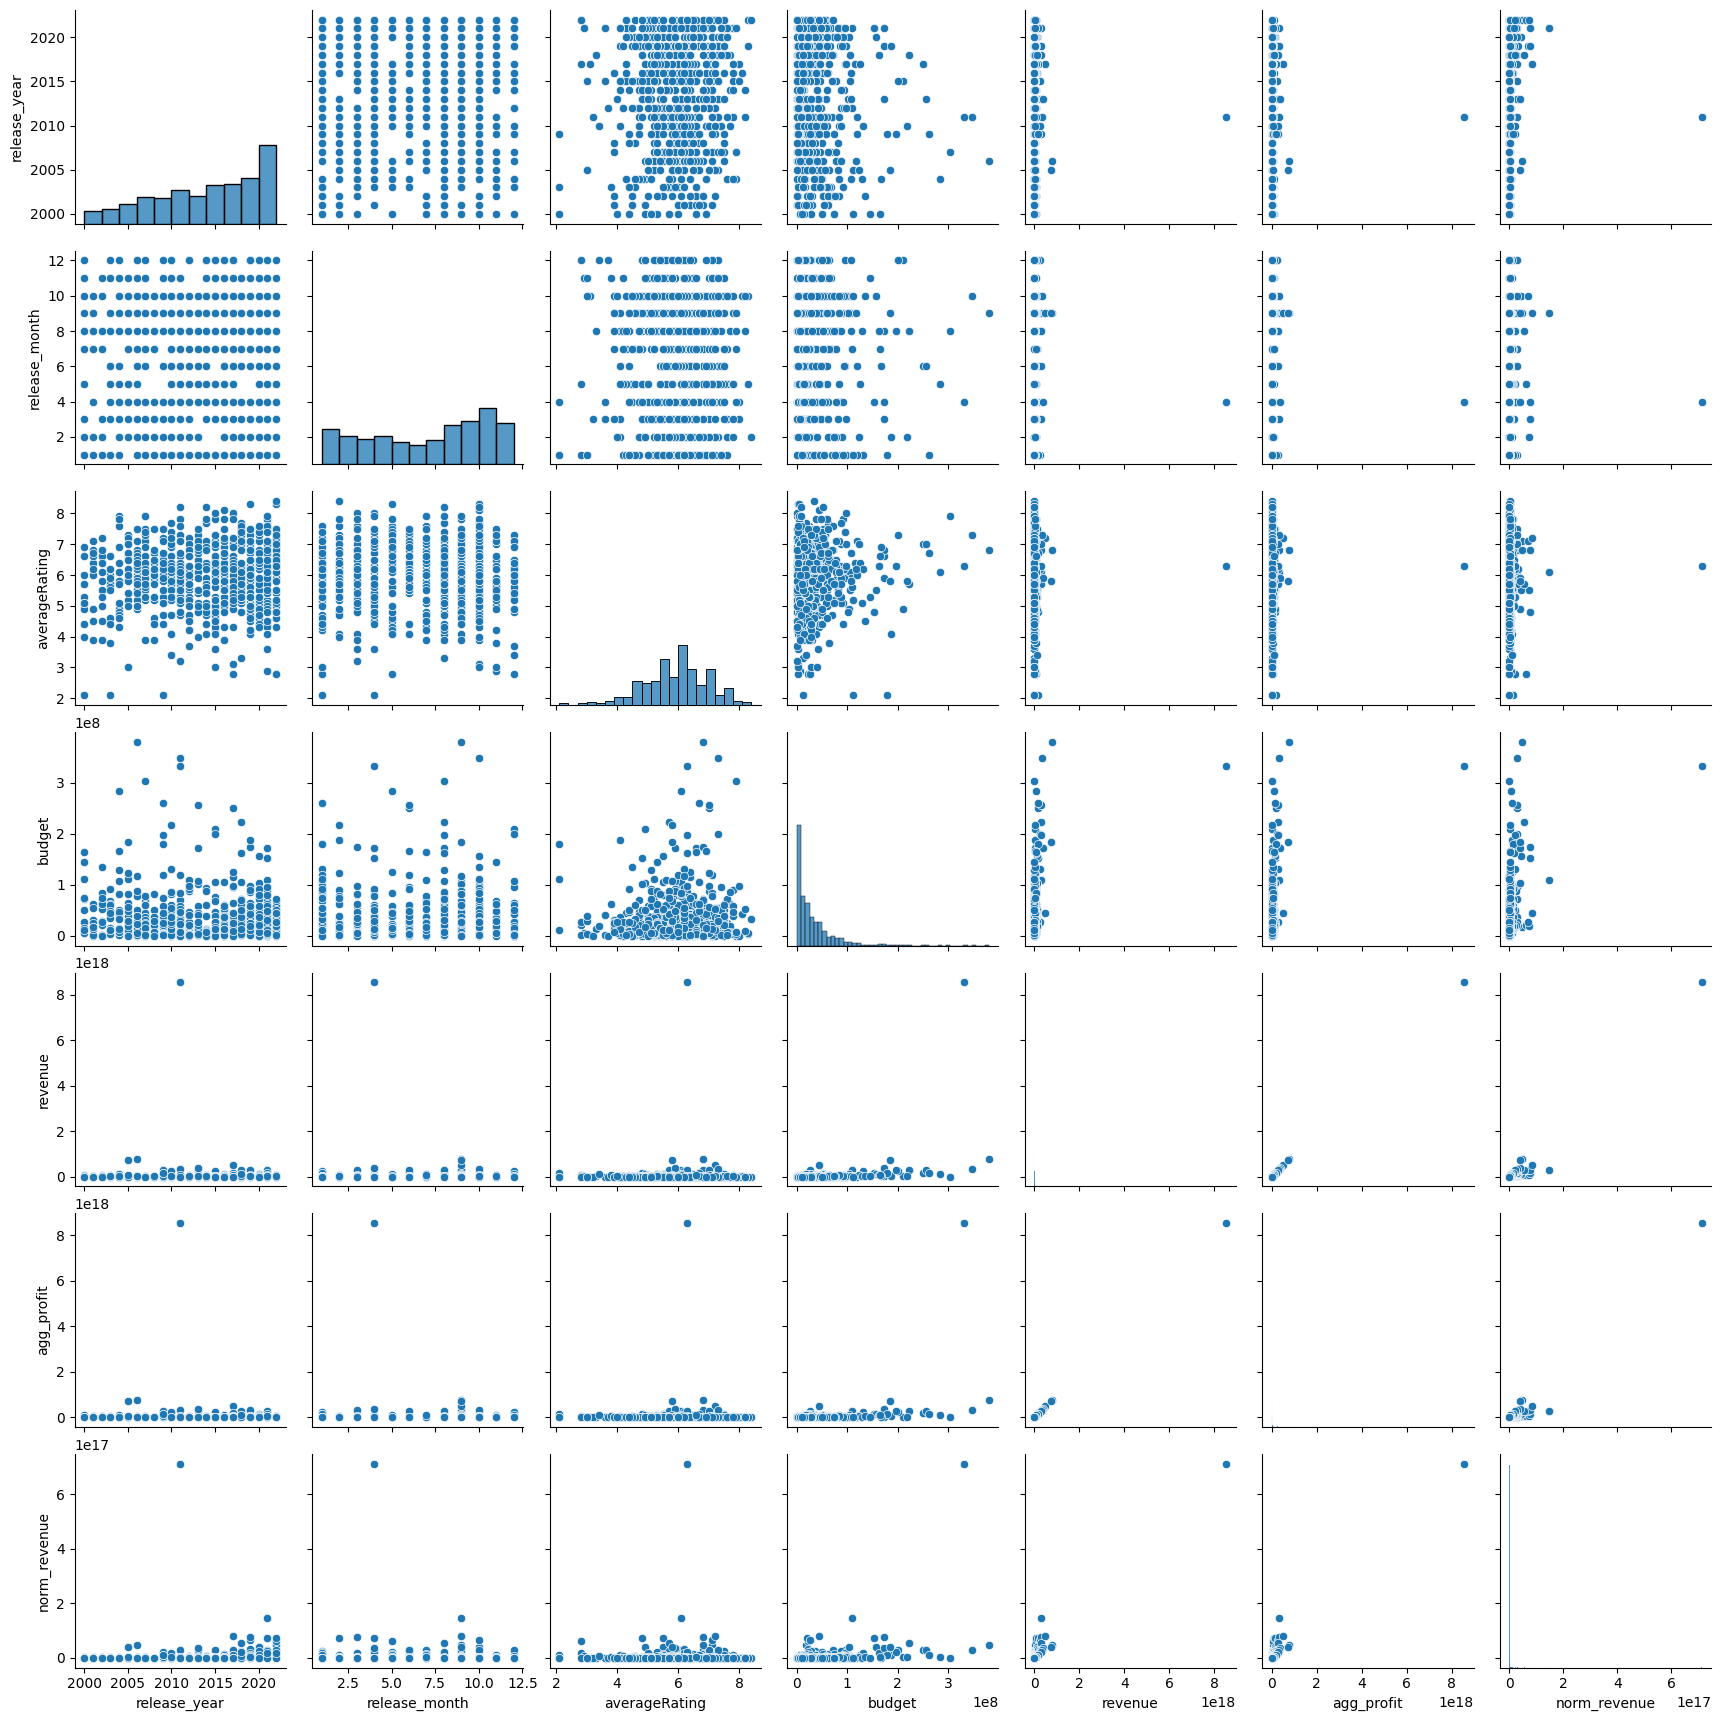

In [11]:
sns.pairplot(cent21_df)
plt.show()

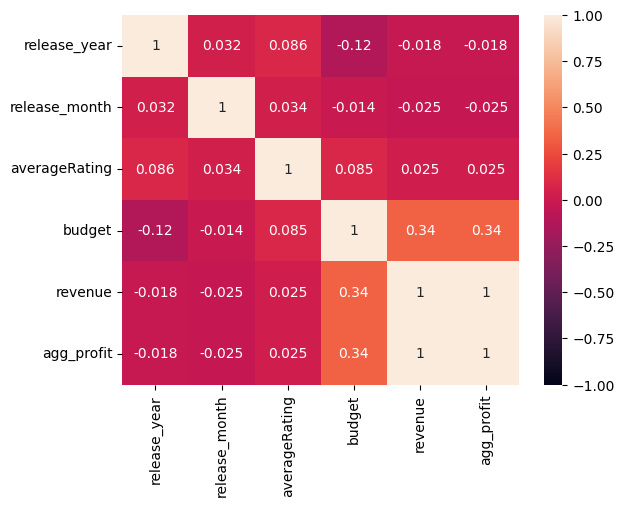

In [12]:
corr_data = cent21_df[["release_year", "release_month", "averageRating", "budget", "revenue", "agg_profit"]].corr()
sns.heatmap(corr_data, vmin=-1, vmax=1, annot=True)
plt.show()

still relatively poor linear coorelation, but we could include budget vs profit/revenue

<Axes: xlabel='release_month', ylabel='agg_profit'>

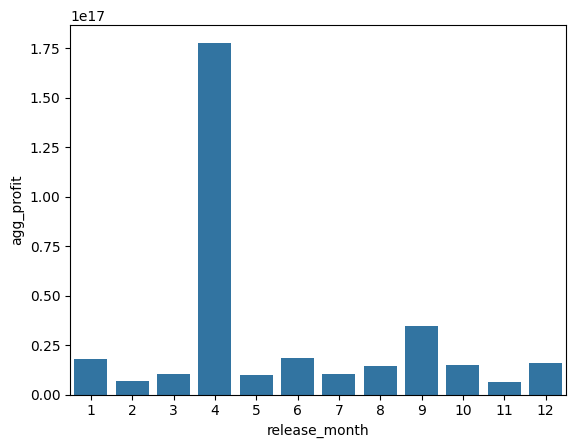

In [ ]:
data = cent21_df[["release_month", "agg_profit"]].groupby(['release_month']).mean()
sns.barplot(data, x="release_month", y="agg_profit")

In [34]:
cent21_df.reset_index()["release_month"]

0      12
1      11
2      10
3      10
4      10
       ..
684     5
685     3
686     2
687     1
688     1
Name: release_month, Length: 689, dtype: int64